### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set()
sns.set_palette('deep')
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
st_scaler = StandardScaler()

In [5]:
X_train_scaled = pd.DataFrame(st_scaler.fit_transform(X_train), columns = boston.feature_names)
X_test_scaled = pd.DataFrame(st_scaler.transform(X_test), columns = boston.feature_names)

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [7]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

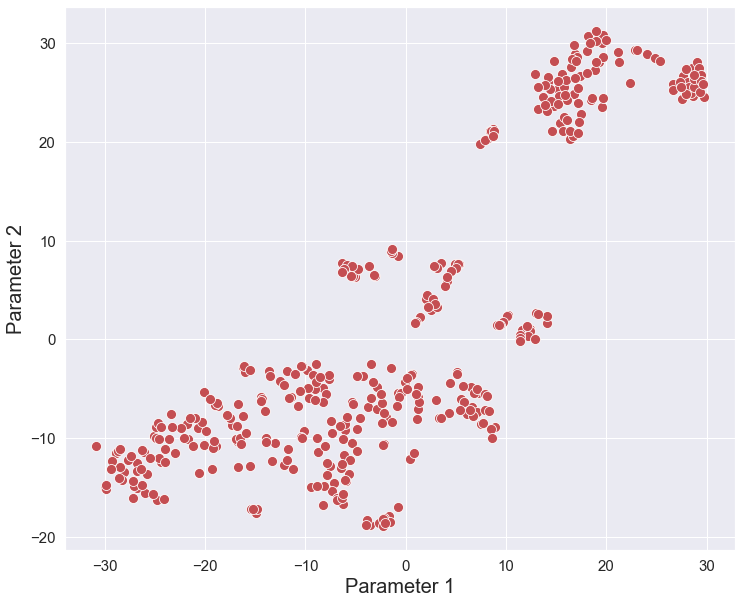

In [8]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], color = 'r', s=100)
plt.xlabel('Parameter 1', size = 20)
plt.ylabel('Parameter 2', size = 20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

Очевидно наличие двух или трёх кластеров.

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_clust = kmeans.fit_predict(X_train_scaled)
centers = kmeans.cluster_centers_

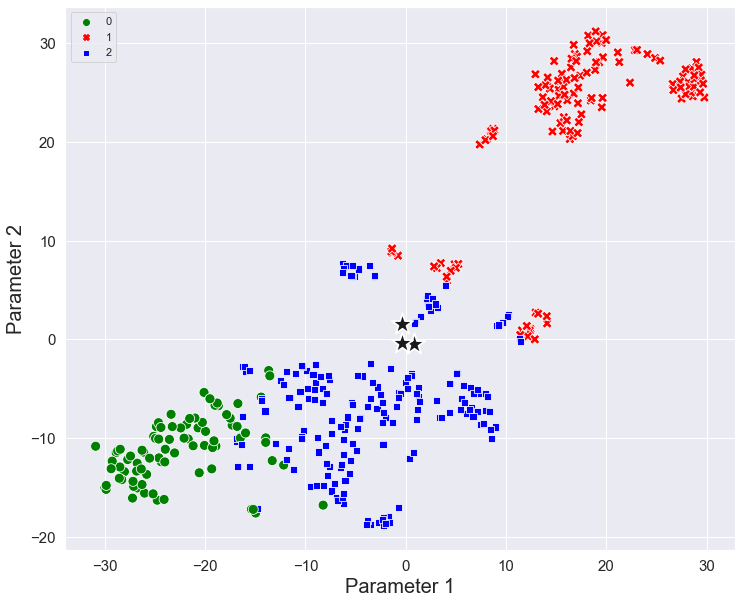

In [10]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=X_train_tsne[:,0], y=X_train_tsne[:,1], hue = train_clust, style = train_clust, palette=['green', 'red', 'blue'], s = 100)
sns.scatterplot(centers[:,0], centers[:,1], marker='*', s = 500, color='k')
plt.xlabel('Parameter 1', size = 20)
plt.ylabel('Parameter 2', size = 20)
plt.legend(loc=2)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [11]:
def get_cluster_feature_mean(cluster_model, num_of_clusters, dataset, feature_name):
    for i in range(num_of_clusters):
        print(f"Cluster {i}, feature {feature_name}: mean={round(dataset.loc[cluster_model==i, feature_name].mean(),3)}")

In [12]:
get_cluster_feature_mean(train_clust,centers.shape[0], X_train, 'CRIM')

Cluster 0, feature CRIM: mean=0.074
Cluster 1, feature CRIM: mean=10.797
Cluster 2, feature CRIM: mean=0.422


In [13]:
full_data_train = X_train
full_data_train['price'] = y_train
get_cluster_feature_mean(train_clust,centers.shape[0], full_data_train, 'price')

Cluster 0, feature price: mean=27.788
Cluster 1, feature price: mean=16.165
Cluster 2, feature price: mean=24.958


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [14]:
test_clust = kmeans.predict(X_test_scaled)

In [15]:
full_data_test = X_test
full_data_test['price'] = y_test
for el in ['CRIM', 'price']:
    get_cluster_feature_mean(test_clust,centers.shape[0], full_data_test, el)

Cluster 0, feature CRIM: mean=0.062
Cluster 1, feature CRIM: mean=10.166
Cluster 2, feature CRIM: mean=0.266
Cluster 0, feature price: mean=31.35
Cluster 1, feature price: mean=16.437
Cluster 2, feature price: mean=21.861
